# Workshop 2
# Part III: Advanced Matplotlib

We introduced Matplotlib in the previous section and used the syntax `plt.some_function()` to create and customize plots. This is called the `pyplot` style and is one of two coding styles. The second, which you will come across in examples, is the so-called object-oriented approach. For this it is important to understand how plots are represented in Matplotlib.

There are two important object types in a matplotlib plot:
1. the figure, is essentially the canvas that is drawn on
2. the axes, represents a single plot and is where data is plotted, there can be multiple axes in a figure (don't confuse this with the word "axis", which refers to the x/y axis of a plot).

The advantage of the object-oriented approach is that is is more explicit and can be easier to write and read when the figures become more complex.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)

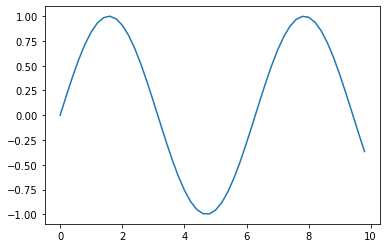

In [3]:
# here we create a figure and one axes explicitely
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y)

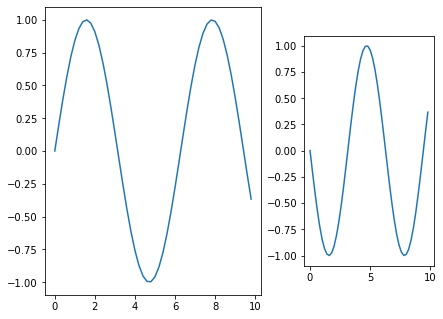

In [4]:
# we can explicitely create an axes object and set the location
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.5, 1]) # [left, bottom, width, height]
ax2 = fig.add_axes([0.6, .1, 0.3, .8])
ax1.plot(x, y)
ax2.plot(x, -y)

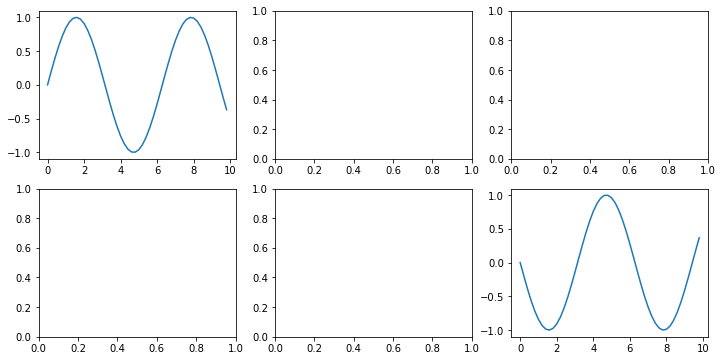

In [5]:
# plt.subplots creates the figure and an array of axes in one line
fig = plt.figure(figsize=(12, 6))
axes = fig.subplots(nrows=2, ncols=3)
axes[0,0].plot(x,y)
axes[1,2].plot(x,-y)

__We recommend that you use this style to create figures, even if they only contain only a single axes object, then you can easily use the object oriented coding style__

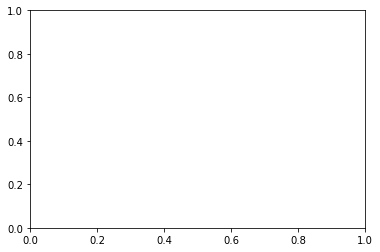

In [6]:
f, ax = plt.subplots()

## Colors and colormaps
There is a range of named colors in matplotlib:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

and you noticed that additional lines are plotted in a different color. This is the so-called color cyle.

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


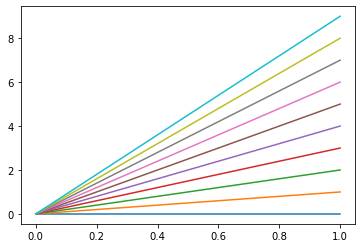

In [7]:
# these are the hexadecimal codes of the colors in the standard color cycle
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])
for i in range(10):
    plt.plot([0,1],[0,i])

### Colormaps
There is a nice [colormap overview](https://matplotlib.org/tutorials/colors/colormaps.html)

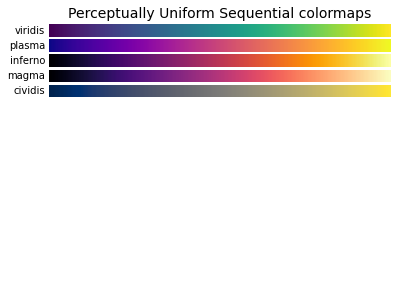

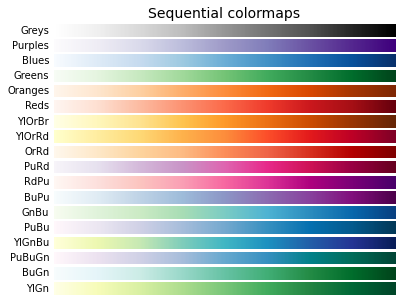

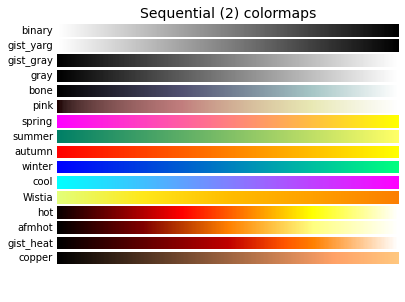

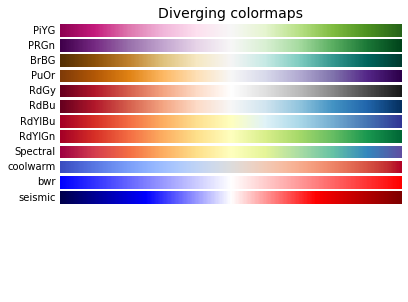

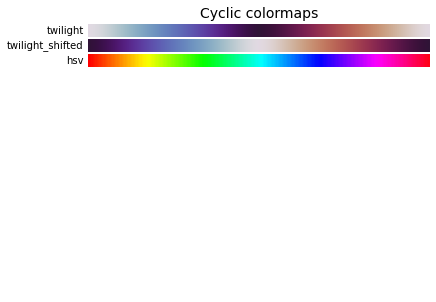

In [8]:
import matplotlib as mpl
from collections import OrderedDict
cmaps = OrderedDict()
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']
cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']

nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)


### Markers

There are [lots of different markers](https://matplotlib.org/api/markers_api.html) availabile in matplotlib!

NameError: name 'z' is not defined

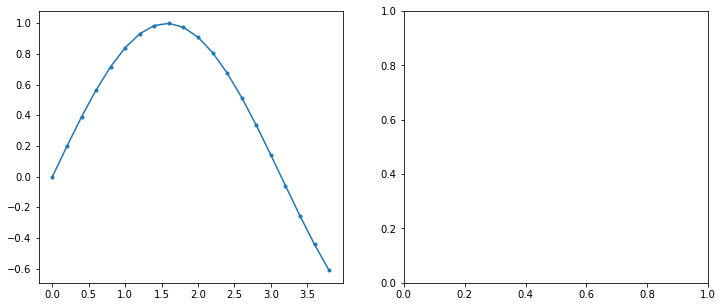

In [9]:
fig, axes = plt.subplots(figsize=(12, 5), ncols=2)

axes[0].plot(x[:20], y[:20], marker='.')
axes[0].plot(x[:20], z[:20], marker='o')

axes[1].plot(x[:20], z[:20], marker='^',
             markersize=10, markerfacecolor='r',
             markeredgecolor='k')

### Label, Ticks, and Gridlines

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(x, y)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'A complicated math function: $f(x) = \cos(x)$')

ax.set_xticks(np.pi * np.array([-1, 0, 1]))
ax.set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
ax.set_yticks([-1, 0, 1])

ax.set_yticks(np.arange(-1, 1.1, 0.2), minor=True)
#ax.set_xticks(np.arange(-3, 3.1, 0.2), minor=True)

ax.grid(which='minor', linestyle='--')
ax.grid(which='major', linewidth=2)


### Axis Limits

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, x, z)
ax.set_xlim(-5, 5)
ax.set_ylim(-3, 3)

### Text Annotations

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.text(-3, 0.3, 'hello world')
ax.annotate('the maximum', xy=(0, 1),
             xytext=(0, 0), arrowprops={'facecolor': 'k'})

## <span style="color:blue">Exercises</span>

1. Create figure with 2x3 subplots, use a different plot type in each of them. Use text annotations and grid lines in at least one subplot and restrict the x limit range in one of them.
<img src="figures/2c1.png" width="600">

## <span style="color:green">Solutions</span>
Again, this is a  possible solutions.

In [ ]:
f, ax = plt.subplots(2, 3, figsize=(12,6))

x1d = np.linspace(-2*np.pi, 2*np.pi, 100)
y1d = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x1d, y1d)
f = np.cos(xx) * np.sin(yy)

for factor in np.linspace(0.2, 1, 11):
    ax[0,0].plot(x, factor*y)
ax[0,1].scatter(x, y)
ax[0,2].bar(x, y)
ax[0,1].set_xlim((2,4))
ax[1,0].imshow(f)


u = -np.cos(xx) * np.cos(yy)
v = -np.sin(xx) * np.sin(yy)
clevels = np.arange(-1, 1, 0.2) + 0.1


ax[1,1].contour(xx, yy, f, clevels, cmap='RdBu_r', extend='both', zorder=0)
ax[1,1].quiver(xx[::4, ::4], yy[::4, ::4],
           u[::4, ::4], v[::4, ::4], zorder=1)
ax[1,2].streamplot(xx, yy, u, v, density=2, color=(u**2 + v**2))
plt.savefig(f'figures/2c1')